In [592]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [593]:
# Sections
a1 = -1
b1 = 1

a2 = 0
b2 = 4

# Additional data
epsilon = 1e-6
populationSize = 100

# Iterations 
t_max_i = 10
t_max = 100

# Propabilities
probCrossover = 0.75
probMutation = 0.5

In [594]:
n1 = (int)((b1 - a1) / epsilon)
n2 = (int)((b2 - a2) / epsilon)

bitArraySize1 = getBitArraySize(n1)
bitArraySize2 = getBitArraySize(n2)

In [595]:
def f(x1, x2):
    return math.sqrt(x1**2 + x2**2 + 1) + 0.5 * x1 - 0.5 * x2

In [596]:
def getBitArraySize(n):
    bitArraySize = 0
    
    while n > 0:
        n >>= 1
        bitArraySize += 1
        
    return bitArraySize

In [597]:
def bitToFloat(bitArray, a, b, size):
    return a + ((b - a)) / (2**size - 1) * int(bitArray, 2)

def fitness(individuals):
    #print(f(bitToFloat(individuals[0], a1, b1), bitToFloat(individuals[1], a2, b2)))
    return f(bitToFloat(individuals[0], a1, b1, bitArraySize1), bitToFloat(individuals[1], a2, b2, bitArraySize2))

def populationFitnessFunc(population, lens):
    maximum = 0
    
    for individual in population:
        xi = []
        i = 0
        
        for j in range(0, len(lens)):
            #print('start ',i,'lens[j] ', lens[j])
            #print(individual.slice(i,lens[j]))
            xi.append(individual[i:i+lens[j]])
            i += lens[j]
            
        #print(xi)
        if fitness(xi) > maximum:
            maximum = fitness(xi)
     
    #print(maximum)
    return maximum

In [598]:
def tournamentMethod(population):
    result = random.sample(population, 2)

    firstFitnessFunction = fitness(result[0])
    secondFitnessFunction = fitness(result[1])

    if firstFitnessFunction > secondFitnessFunction:
        best = result[0]
    else:
        best = result[1]  

    return best

def mutation(individual):
    randomProbability = np.random.random_sample()

    if randomProbability <= probMutation:
        charIndexToMutate = np.random.randint(low = 0, high = bitArraySize)
        charToMutate = individual[charIndexToMutate] 

        if charToMutate == '0':
            individual = individual[:charIndexToMutate] + "1" + individual[charIndexToMutate + 1:]
        else:
            individual = individual[:charIndexToMutate] + "0" + individual[charIndexToMutate + 1:]

    return individual

def crossover(population):    
    individualOne = population[np.random.randint(low = 0, high = populationSize - 1)]
    individualTwo = population[np.random.randint(low = 0, high = populationSize - 1)]

    probabilityForCrossover = np.random.random_sample()
    if probabilityForCrossover <= probCrossover:
        randomIndex = np.random.randint(low = 0, high = bitArraySize)

        firstHalf_IndividualOne = individualOne[:randomIndex]
        secondHalf_IndividualOne = individualOne[randomIndex:]

        firstHalf_IndividualTwo = individualTwo[:randomIndex]
        secondHalf_IndividualTwo = individualTwo[randomIndex:]

        crossovered = firstHalf_IndividualOne + secondHalf_IndividualTwo
        crossovered = firstHalf_IndividualTwo + secondHalf_IndividualOne
    else:
        crossovered = individualOne
        crossovered = individualTwo
            
    return crossovered

In [599]:
def applyTournamentForPopulation(population):
    newPopulation = []
    
    while len(newPopulation) < populationSize:
        best = tournamentMethod(population) 
        newPopulation.append(best)
    
    return newPopulation

def mutatePopulation(population):
    newPopulation = []
    
    for individual in population:
        mutatedIndividual = mutation(individual)
        newPopulation.append(mutatedIndividual)

    return newPopulation
        
def crossoverPopulation(population):    
    newPopulation = []
    
    while len(newPopulation) < populationSize:
        crossoveredIndividuals = crossover(population)
        newPopulation.append(crossoveredIndividuals)
            
    return newPopulation

f_max =  1.5991811398217206


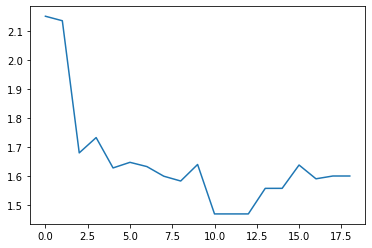

In [600]:
initialPopulation = []
population = []

#print(n1)
#print(bitArraySize1)
#print(bitArraySize2)

for i in range(populationSize):
    initialPopulation += [np.random.randint(2, size = (bitArraySize1 + bitArraySize2,))]
    
for i in range(populationSize):
    population.append("".join(str(x) for x in initialPopulation[i]))

iterations = []
functions = []

best = []
i = 0
max_i = 0
while i <= t_max:
    population = applyTournamentForPopulation(population)
    population = mutatePopulation(population)
    population = crossoverPopulation(population)

    best.append(populationFitnessFunc(population, [bitArraySize1, bitArraySize2]))

    if i > 1:
        #print('\nf_max = ', best[i])
        if best[i] - best[i - 1] < epsilon:
            max_i += 1

    if max_i > t_max_i:
        break

    iterations.append(i)
    functions.append(best[i])

    #print(best[i])
    i += 1    

print('f_max = ', best[i-1])
plt.plot(iterations, functions)